In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.plotting import scatterplotmatrix

import numpy as np
import scipy as sc
from pandas import Series,DataFrame
import pandas as pd
# import plot_matrix as plot_matrix

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix

from collections import OrderedDict
from fractions import Fraction

get_ipython().magic(u'matplotlib inline')
mpl.rcParams['figure.figsize'] = (10.0, 5)

# import seaborn as sns
# # plt.rcParams
# import seaborn as sns
# color = sns.color_palette()
# import warnings
# warnings.filterwarnings('ignore') 
# #Supress unnecessary warnings for readability and cleaner presentation

In [2]:
aisles=pd.read_csv("aisles.csv")
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
departments=pd.read_csv("departments.csv")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
orders=pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
products=pd.read_csv("products.csv")
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
aisles_merge=pd.merge(products,aisles,on="aisle_id",how="inner")
aisles_merge.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [7]:
dept_merge=pd.merge(departments,aisles_merge,on="department_id",how="inner")
dept_merge.head()

,department_id,department,product_id,product_name,aisle_id,aisle
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals
1,1,frozen,30,"Three Cheese Ziti, Marinara with Meatballs",38,frozen meals
2,1,frozen,36,Traditional Lasagna with Meat Sauce Savory Ita...,38,frozen meals
3,1,frozen,81,Blakes Chicken Parmesan Dinner,38,frozen meals
4,1,frozen,100,Peanut Butter & Strawberry Jam Sandwich,38,frozen meals


In [8]:
dept_merge["department_id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [9]:
prior=pd.read_csv("order_products_train_500k.csv")
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
df4=pd.merge(dept_merge,prior, on="product_id",how="inner")
df4.head()


,department_id,department,product_id,product_name,aisle_id,aisle,order_id,add_to_cart_order,reordered
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,317499,13,0
1,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,459014,6,1
2,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,508627,13,0
3,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,732095,8,1
4,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,770868,6,1


In [11]:
finaldf=pd.merge(orders,df4,on="order_id",how="inner")
finaldf.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id,department,product_id,product_name,aisle_id,aisle,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,7,beverages,196,Soda,77,soft drinks,1,1
1,1187899,1,train,11,4,8,14.0,7,beverages,46149,Zero Calorie Cola,77,soft drinks,11,1
2,1187899,1,train,11,4,8,14.0,14,breakfast,13032,Cinnamon Toast Crunch,121,cereal,7,1
3,1187899,1,train,11,4,8,14.0,16,dairy eggs,38928,0% Greek Strained Yogurt,120,yogurt,3,1
4,1187899,1,train,11,4,8,14.0,16,dairy eggs,25133,Organic String Cheese,21,packaged cheese,2,1


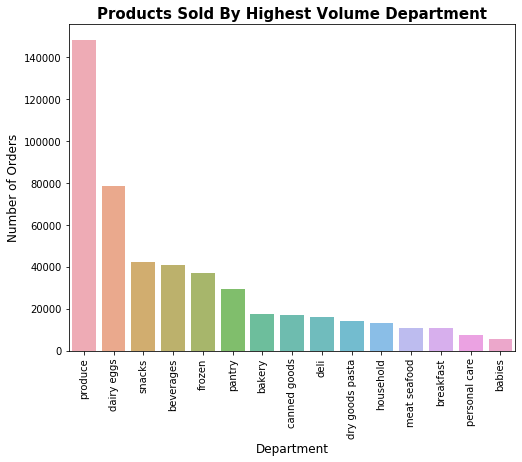

In [37]:
aisle_freq = finaldf['department'].value_counts().head(15)
plt.figure(figsize=(8,6))
sns.barplot(aisle_freq.index, aisle_freq.values, alpha=0.8)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title('Products Sold By Highest Volume Department', fontsize=15,fontweight="bold")
plt.xticks(rotation='vertical')
plt.show()

In [13]:
dept_freq = finaldf['department'].value_counts().head(20)
dept_freq


produce            148138
dairy eggs          78436
snacks              42452
beverages           41018
frozen              36751
pantry              29212
bakery              17312
canned goods        16999
deli                15853
dry goods pasta     14041
household           12936
meat seafood        10888
breakfast           10595
personal care        7596
babies               5569
international        4331
missing              3022
alcohol              2084
pets                 1644
other                 628
Name: department, dtype: int64

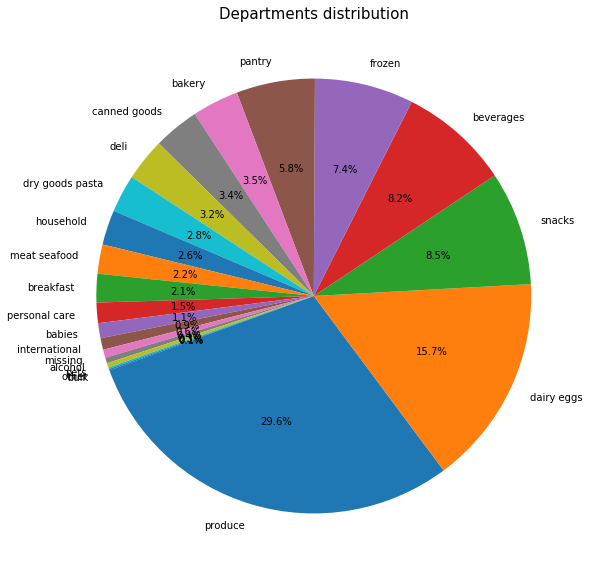

In [14]:
plt.figure(figsize=(10,10))
temp_series = finaldf['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [15]:
r1, r2 = 0, 14
def createList(r1, r2):
    return list(range(r1, r2+1))
print(createList(r1, r2))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


produce            0.296277
dairy eggs         0.156872
snacks             0.084904
beverages          0.082036
frozen             0.073502
pantry             0.058424
bakery             0.034624
canned goods       0.033998
deli               0.031706
dry goods pasta    0.028082
household          0.025872
meat seafood       0.021776
breakfast          0.021190
personal care      0.015192
babies             0.011138
Name: department, dtype: float64

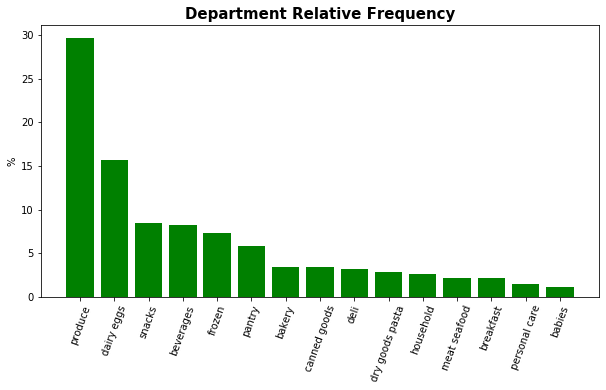

In [55]:
top_depts = finaldf.groupby("department").filter(lambda x: len(x) >= 5569)
series = top_depts["department"].value_counts() / len(finaldf)
indx = createList(r1, r2)
plt.bar(indx, series*100, color="green")
plt.ylabel("%")
# plt.title("Relative frequency")
plt.title("Department Relative Frequency",fontsize=15,fontweight="bold")
plt.savefig("Department_relative_freq.png", bbox_inches="tight")



plt.xticks(indx, series.index, rotation=70)
series

In [17]:
# basket=(finaldf[finaldf["order_id"]=="2539329"]\
#         .groupby(["order_id","product_name"])["order_id"]\
#         .count().unstack().reset_index().fillna(0)
#         .set_index("order_id")
# )
# basket=(finaldf.groupby(["order_id","product_name"]).count()["reordered"])
# a = basket.to_frame()
#         #.unstack()\
#          #.reset_index().fillna(0))
#         # .set_index("order_id"))
# b = a.reset_index().drop(columns =["order_id"])

# c = b.T
# c.head(5)

basket2=(finaldf.
        groupby(["order_id","department"])["reordered"]
        .count().unstack().reset_index().fillna(0)
        .set_index("order_id"))

basket2

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
98,0.0,0.0,1.0,4.0,0.0,0.0,8.0,11.0,3.0,0.0,...,5.0,0.0,1.0,0.0,0.0,4.0,1.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1227633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1227666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
basket2.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
98,0.0,0.0,1.0,4.0,0.0,0.0,8.0,11.0,3.0,0.0,...,5.0,0.0,1.0,0.0,0.0,4.0,1.0,0.0,7.0,1.0


In [19]:
def encode_units(x):
    if x <=0:
        return 0
    if x>=1:
        return 1
basket_sets2=basket2.applymap(encode_units)   
basket_sets2

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
36,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
96,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
98,0,0,1,1,0,0,1,1,1,0,...,1,0,1,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227622,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
1227633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1227666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
basket_sets2renamed =basket_sets2.rename_axis(None)
basket_sets2renamed.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
36,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
96,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
98,0,0,1,1,0,0,1,1,1,0,...,1,0,1,0,0,1,1,0,1,1


In [21]:
frequent_itemsets=apriori(basket_sets2,min_support=0.30,use_colnames=True)
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(dairy eggs),(beverages),0.665453,0.465124,0.324294,0.487329,1.047739,0.014776,1.043312
1,(beverages),(dairy eggs),0.465124,0.665453,0.324294,0.697221,1.047739,0.014776,1.104922
2,(dairy eggs),(frozen),0.665453,0.389646,0.300651,0.451799,1.159512,0.041360,1.113376
3,(frozen),(dairy eggs),0.389646,0.665453,0.300651,0.771600,1.159512,0.041360,1.464743
4,(dairy eggs),(produce),0.665453,0.738257,0.542919,0.815864,1.105121,0.051643,1.421462
5,(produce),(dairy eggs),0.738257,0.665453,0.542919,0.735406,1.105121,0.051643,1.264379
6,(dairy eggs),(snacks),0.665453,0.434196,0.321978,0.483849,1.114355,0.033041,1.096198
7,(snacks),(dairy eggs),0.434196,0.665453,0.321978,0.741551,1.114355,0.033041,1.294441
8,(produce),(frozen),0.738257,0.389646,0.315662,0.427577,1.097349,0.028003,1.066265
9,(frozen),(produce),0.389646,0.738257,0.315662,0.810126,1.097349,0.028003,1.378507


In [22]:
rules_by_lift = rules.sort_values(by="lift", ascending=False)
rules_by_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(dairy eggs),(frozen),0.665453,0.389646,0.300651,0.451799,1.159512,0.041360,1.113376
3,(frozen),(dairy eggs),0.389646,0.665453,0.300651,0.771600,1.159512,0.041360,1.464743
6,(dairy eggs),(snacks),0.665453,0.434196,0.321978,0.483849,1.114355,0.033041,1.096198
7,(snacks),(dairy eggs),0.434196,0.665453,0.321978,0.741551,1.114355,0.033041,1.294441
4,(dairy eggs),(produce),0.665453,0.738257,0.542919,0.815864,1.105121,0.051643,1.421462
5,(produce),(dairy eggs),0.738257,0.665453,0.542919,0.735406,1.105121,0.051643,1.264379
8,(produce),(frozen),0.738257,0.389646,0.315662,0.427577,1.097349,0.028003,1.066265
9,(frozen),(produce),0.389646,0.738257,0.315662,0.810126,1.097349,0.028003,1.378507
10,(snacks),(produce),0.434196,0.738257,0.337369,0.776997,1.052474,0.016820,1.173717
11,(produce),(snacks),0.738257,0.434196,0.337369,0.456980,1.052474,0.016820,1.041958


In [23]:
rules_2=rules_by_lift[(rules_by_lift["lift"]>=1.0)& 
     (rules_by_lift["confidence"]>=0.5)]
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(frozen),(dairy eggs),0.389646,0.665453,0.300651,0.771600,1.159512,0.041360,1.464743
7,(snacks),(dairy eggs),0.434196,0.665453,0.321978,0.741551,1.114355,0.033041,1.294441
4,(dairy eggs),(produce),0.665453,0.738257,0.542919,0.815864,1.105121,0.051643,1.421462
5,(produce),(dairy eggs),0.738257,0.665453,0.542919,0.735406,1.105121,0.051643,1.264379
9,(frozen),(produce),0.389646,0.738257,0.315662,0.810126,1.097349,0.028003,1.378507
10,(snacks),(produce),0.434196,0.738257,0.337369,0.776997,1.052474,0.016820,1.173717
1,(beverages),(dairy eggs),0.465124,0.665453,0.324294,0.697221,1.047739,0.014776,1.104922


In [24]:
rules_2.to_csv("final_dept.csv")

In [25]:
basket2["dairy eggs"].sum()

78436.0

In [26]:
basket2["beverages"].sum()

41018.0

In [27]:
cols = ['antecedents','consequents']
rules_2[cols] = rules_2[cols].applymap(lambda x: tuple(x))
rules_2.head()

C:\Users\priya\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,"(frozen,)","(dairy eggs,)",0.389646,0.665453,0.300651,0.771600,1.159512,0.041360,1.464743
7,"(snacks,)","(dairy eggs,)",0.434196,0.665453,0.321978,0.741551,1.114355,0.033041,1.294441
4,"(dairy eggs,)","(produce,)",0.665453,0.738257,0.542919,0.815864,1.105121,0.051643,1.421462
5,"(produce,)","(dairy eggs,)",0.738257,0.665453,0.542919,0.735406,1.105121,0.051643,1.264379
9,"(frozen,)","(produce,)",0.389646,0.738257,0.315662,0.810126,1.097349,0.028003,1.378507


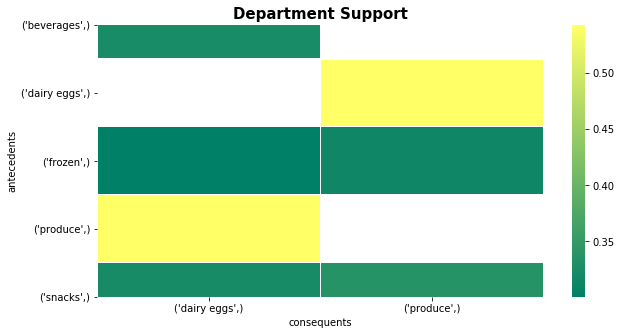

In [43]:
data = rules_2.pivot_table(index='antecedents', columns='consequents', values='support')
# sns.palplot(sns.color_palette("BuGn_r"))
plt.title("Department Support",fontsize=15,fontweight="bold")


ax = sns.heatmap(data, linewidths=0.1,cmap="summer")
plt.savefig("dept_support.png", bbox_inches="tight")
# sns.heatmap(data)
# # result = df.pivot(index='SymmetricDivision', columns='MutProb', values='value')
# # sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
# # plt.show()
# # data = df.pivot(index='SymmetricDivision', columns='MutProb', values='value')
# sns.heatmap(data, annot=False, fmt="g", cmap='viridis')
# plt.show()

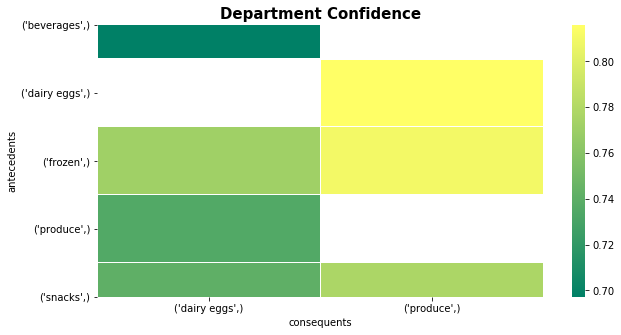

<Figure size 720x360 with 0 Axes>

In [44]:
data = rules_2.pivot_table(index='antecedents', columns='consequents', values='confidence')
plt.title("Department Confidence",fontsize=15,fontweight="bold")

ax = sns.heatmap(data,linewidths=0.1,cmap="summer")
plt.show()
plt.savefig("dept_confidence.png", bbox_inches="tight")

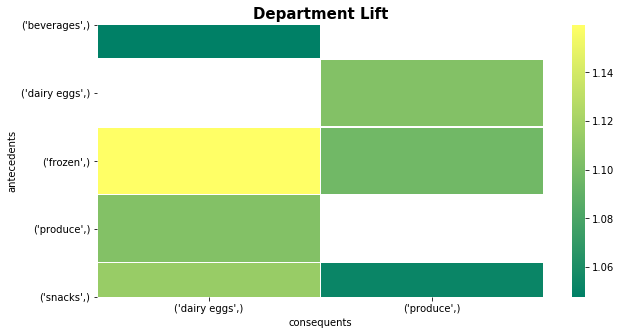

In [45]:
data = rules_2.pivot_table(index='antecedents', columns='consequents', values='lift')
plt.title("Department Lift",fontsize=15,fontweight="bold")

ax = sns.heatmap(data, linewidths=0.2,cmap="summer")
plt.savefig("dept_lift.png", bbox_inches="tight")
plt.show()

In [31]:
import networkx as nx


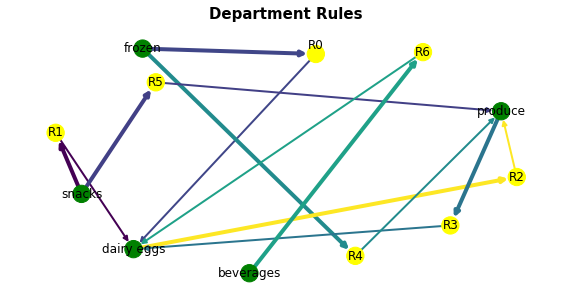

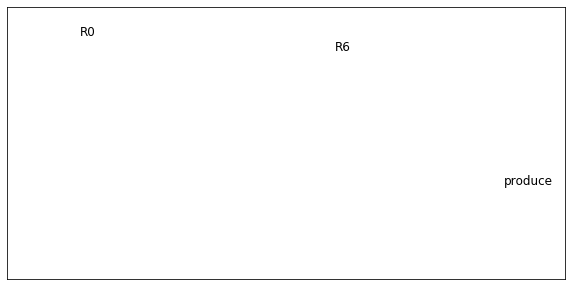

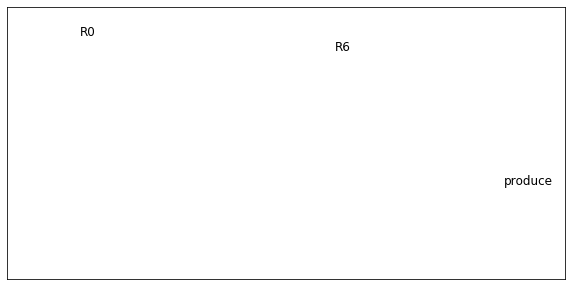

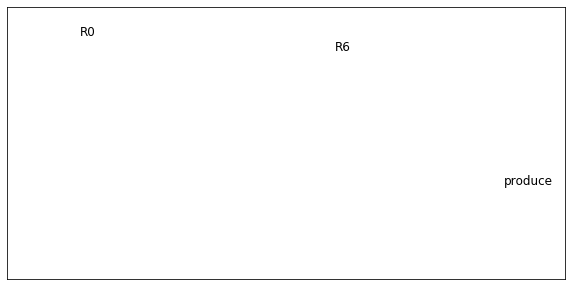

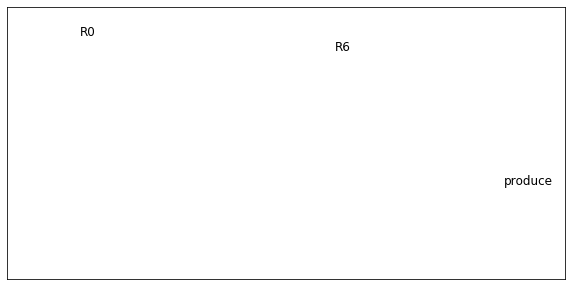

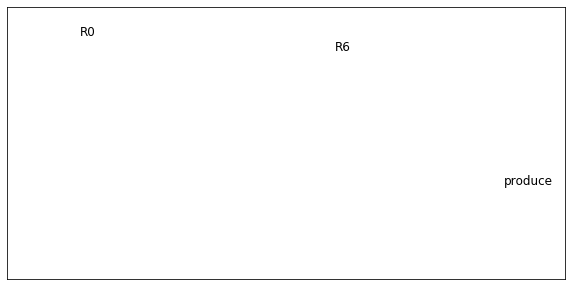

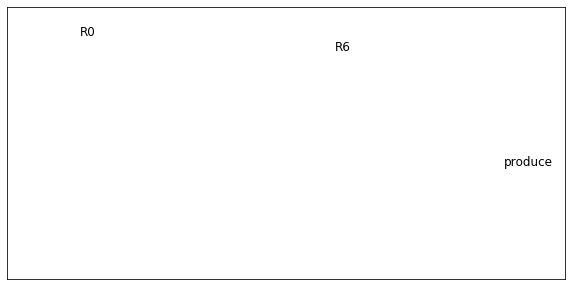

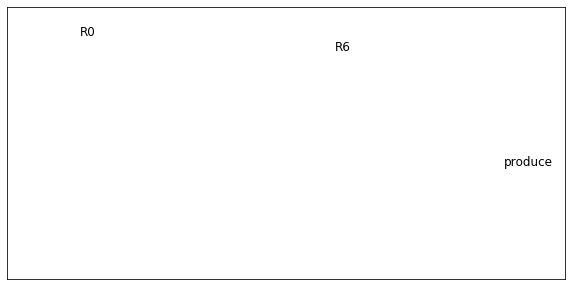

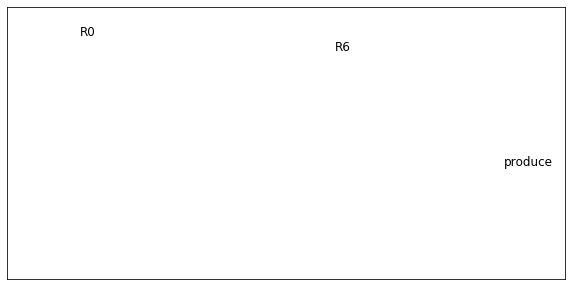

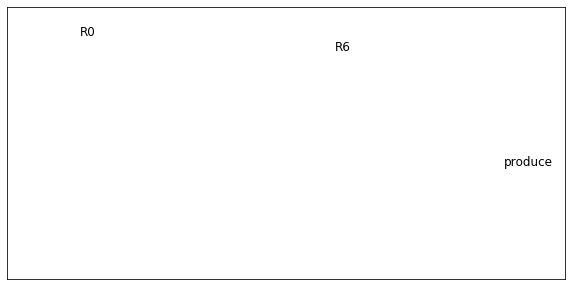

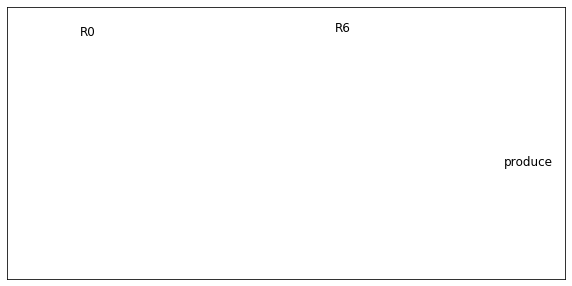

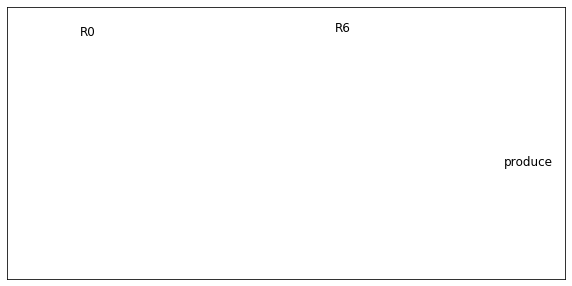

In [46]:
def draw_graph(rules_2, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules_2.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 4)
        for c in rules_2.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos)
        plt.show()
plt.title("Department Rules",fontsize=15,fontweight="bold")

draw_graph (rules_2, 7) 

In [51]:
import numpy as np
import scipy as sc
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from collections import OrderedDict
from fractions import Fraction

get_ipython().magic(u'matplotlib inline')
mpl.rcParams['figure.figsize'] = (10.0, 5)

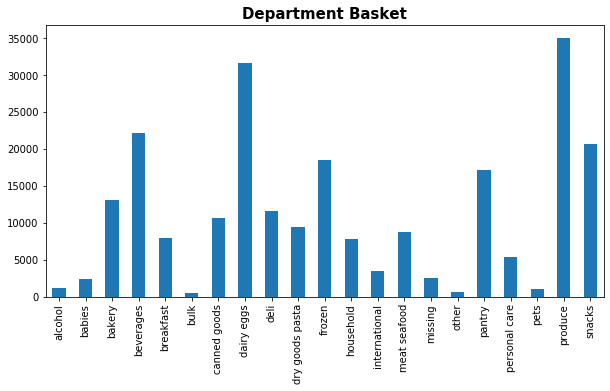

In [53]:

product_support_dict = {}
for column in basket_sets2.columns:
    product_support_dict[column] = sum(basket_sets2[column]>0)
#  plt.title("Department Support",fontsize=15,fontweight="bold")

# visualise support
pd.Series(product_support_dict).plot(kind="bar")
plt.title("Department Basket",fontsize=15,fontweight="bold")
plt.savefig("dept_basket.png", bbox_inches="tight")


In [ ]:
# Support V/s Confidence
plt.scatter(rules_2['support'], rules_2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [ ]:
# Support V/s Lift

plt.scatter(rules_2['support'], rules_2['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# plt.scatter(rules[‘support’], rules[‘lift’], alpha=0.5)
# plt.xlabel(‘support’)
# plt.ylabel(‘lift’)
# plt.title(‘Support vs Lift’)
# plt.show()


In [ ]:
# Lift V/s Confidence

plt.scatter(rules_2['lift'], rules_2['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs Confidence')
plt.show()



In [ ]:
fit=np.polyfit(rules_2['lift'],rules_2['confidence'],1)
fit_fn=np.poly1d(fit)
plt.plot(rules_2['lift'],rules_2['confidence'],'yo',rules_2['lift'],
        fit_fn(rules_2['lift']))
plt.show()


# fit = np.polyfit(rules[‘lift’], rules[‘confidence’], 1)
# fit_fn = np.poly1d(fit)
# plt.plot(rules[‘lift’], rules[‘confidence’], ‘yo’, rules[‘lift’], 
#  fit_fn(rules[‘lift’]))
# plt.show()